# Running sounds through Keras graphs

In this tutorial, we run sounds through different activations to get an idea how they behave.

In [1]:
import IPython

x_train shape: (40, 220500, 1)
40 train samples
Saving arrays to file


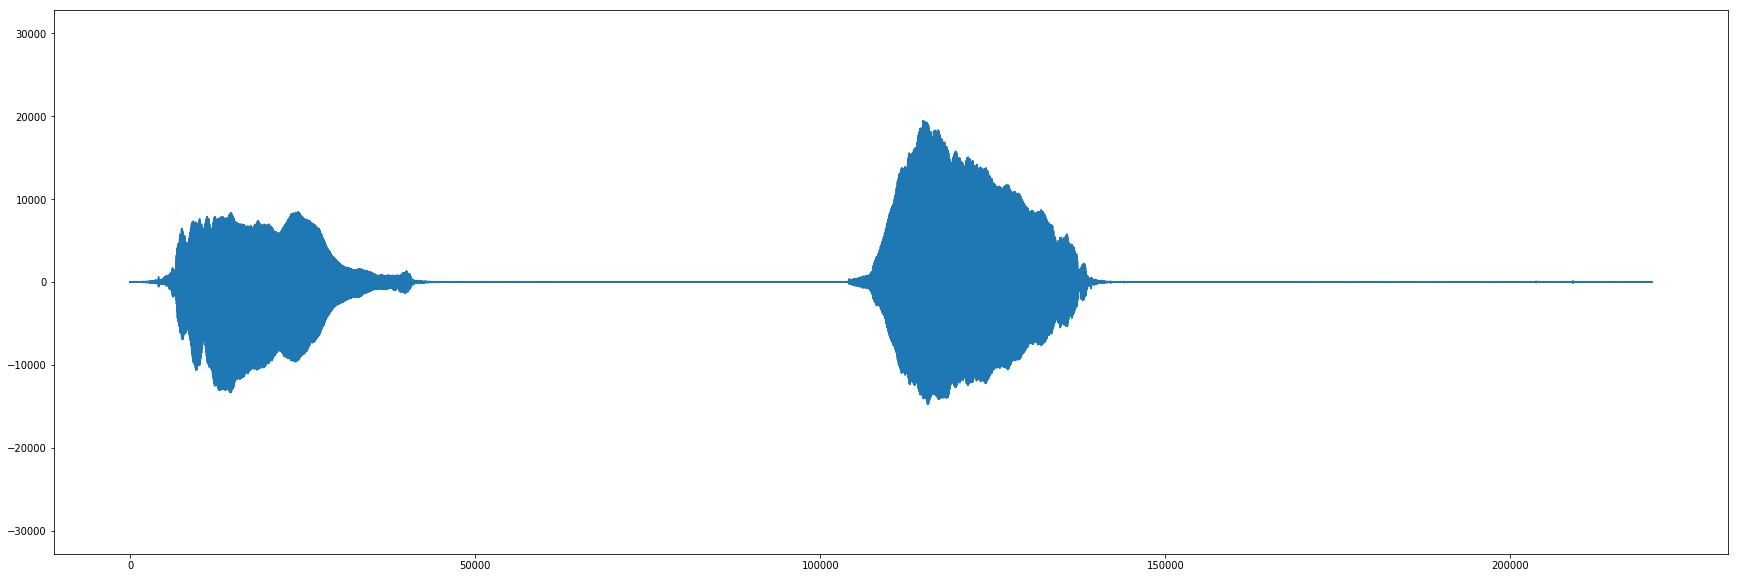

saving sound from category original folder endtoend
output/endtoend/original#0.wav


In [3]:
import keras
from pydub import AudioSegment
from keras.models import Sequential, Model
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Input, Dense, UpSampling1D, Conv1D, Activation, Reshape, Flatten
import numpy as np
from playsound import save_sound
from audio_loader import load_all

latent_dim = 100

#sound = AudioSegment.from_wav("input/speech_commands/bird/0a7c2a8d_nohash_1.wav")
sound = load_all("categorized", "cat",forceLoad=True)

path = save_sound(sound, "endtoend", "original", upscale=False, index=1)
print(path)
IPython.display.Audio(filename=path)

(220500, 1)


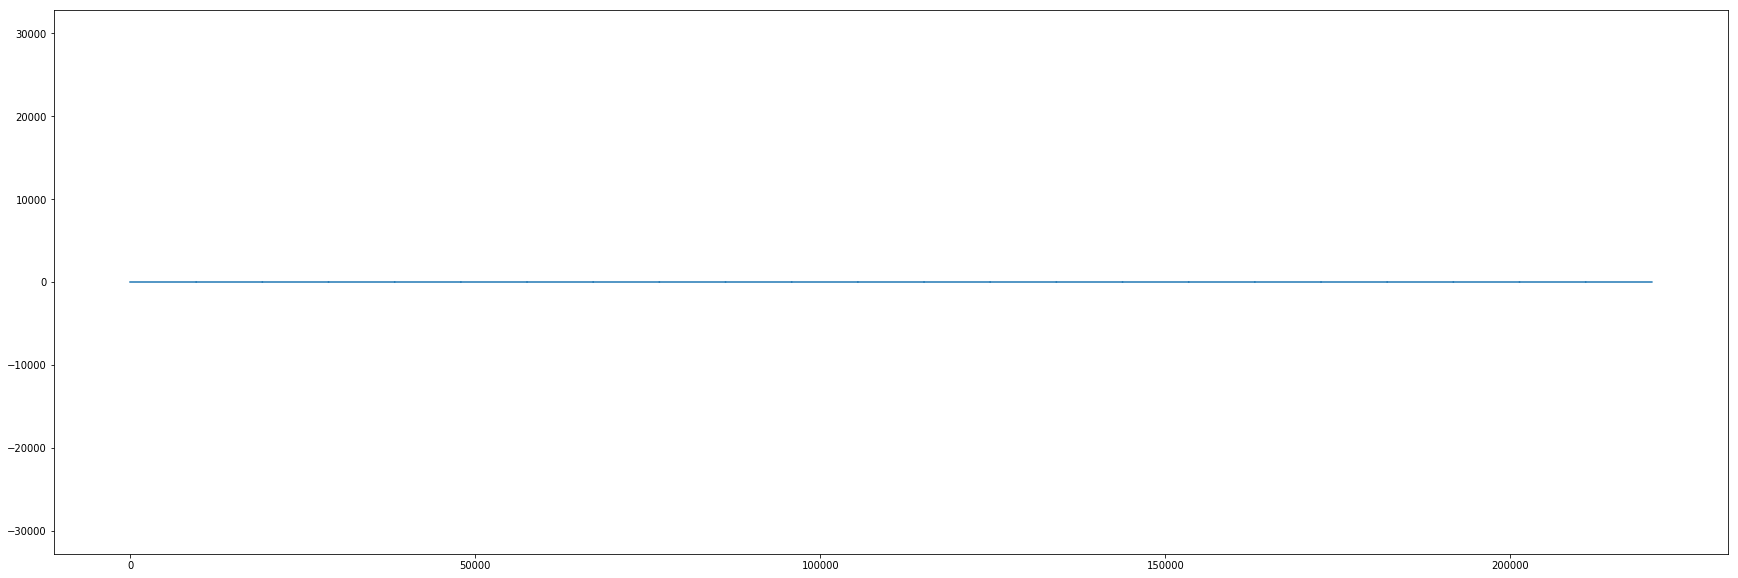

saving sound from category normalized folder endtoend
(1, 220500)


In [31]:
sound = sound / 65536
sound = sound + 0.5
target = np.array(sound[0])
print(target.shape)
path = save_sound(sound, "endtoend", "normalized", upscale=True, index=0)
IPython.display.Audio(filename=path)

input_shape = (1,target.shape[0])
print(input_shape)

x_train shape: (40, 220500, 1)
40 train samples
Saving arrays to file


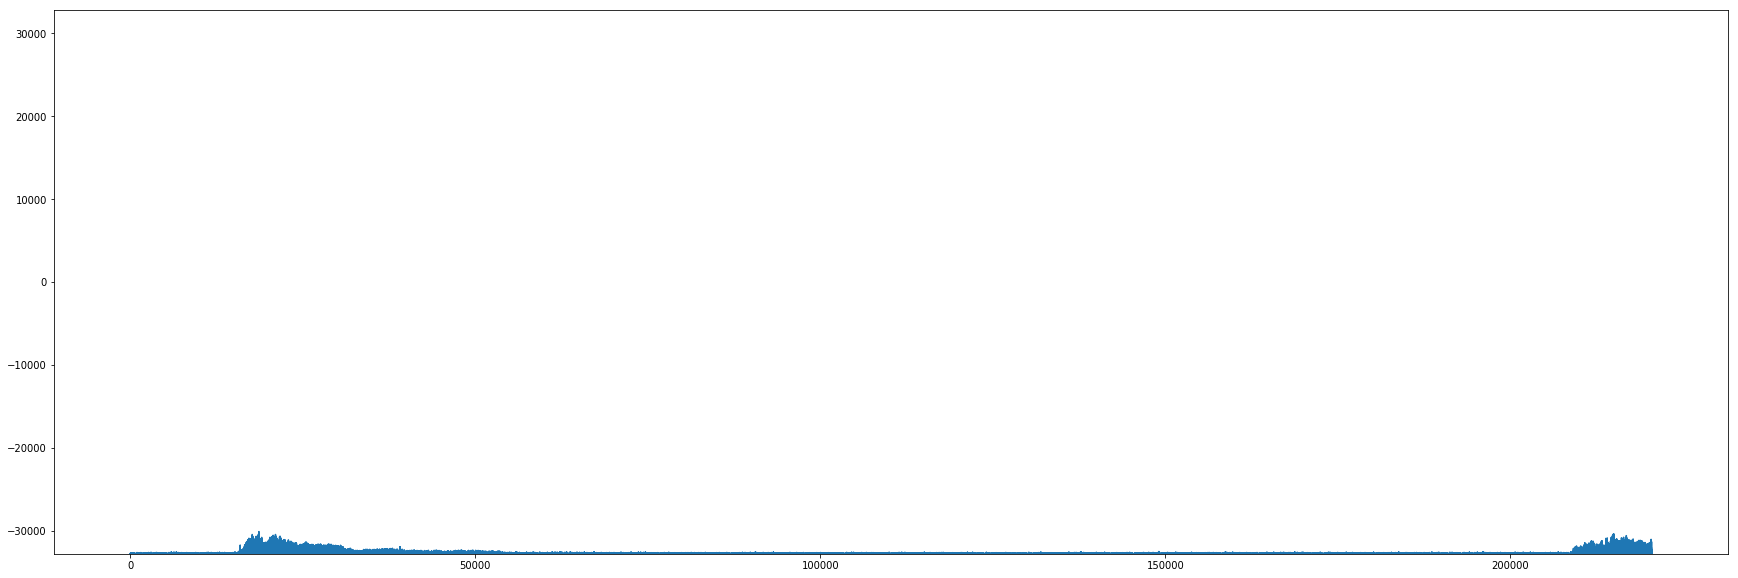

saving sound from category normalized folder endtoend


In [37]:
sound = load_all("categorized", "cat",forceLoad=True)
sound = sound / 65536
target = np.array(sound[0])
path = save_sound(sound, "endtoend", "normalized", upscale=True, index=0)
IPython.display.Audio(filename=path)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
activation_17 (Activation)   (None, 1, 220500)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


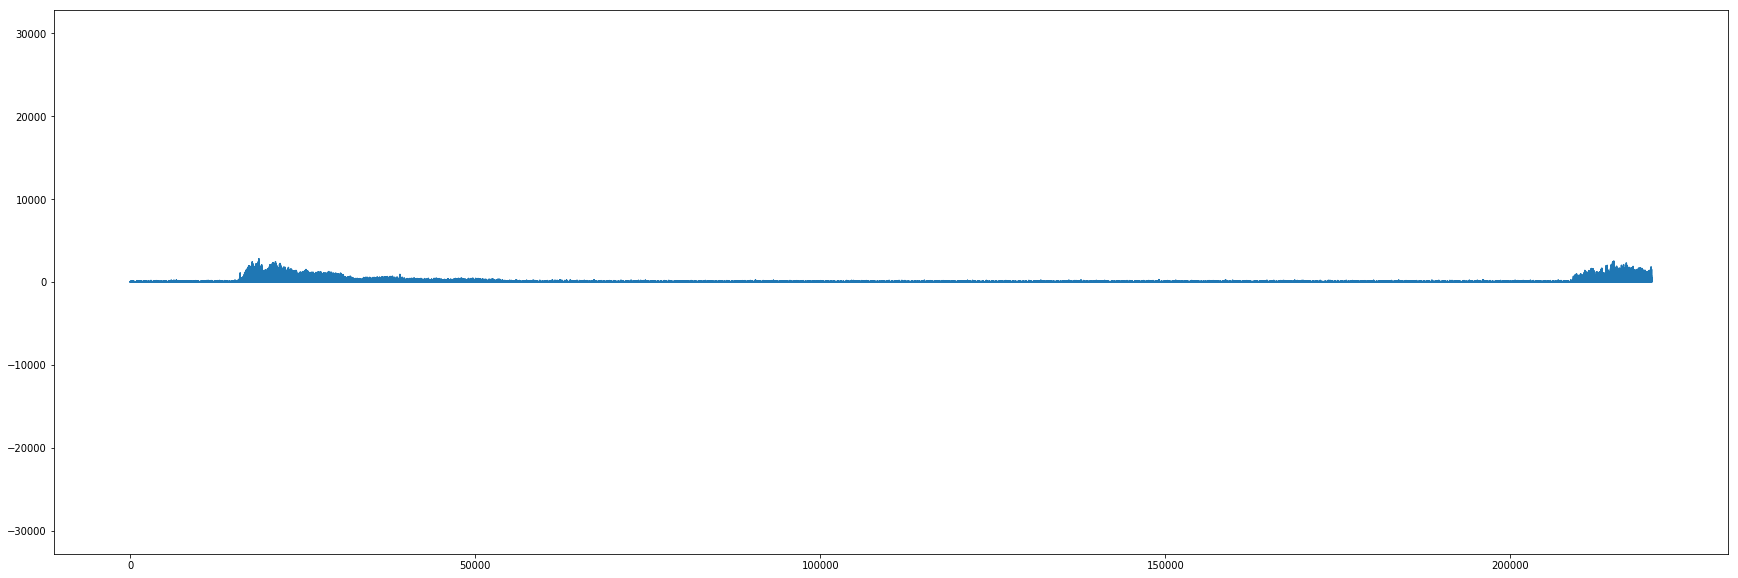

saving sound from category reluactivatedx6 folder endtoend


In [29]:
model = Sequential()

model.add(Activation("selu", input_shape=input_shape))

model.summary()

noise = Input(shape=(len(sound[0]),))
clip = model(noise)

generator = Model(noise, clip)

target = target.reshape(target.shape[1], target.shape[0])
gen_clip = generator.predict(target, 1)

path = save_sound(gen_clip, "endtoend", "reluactivatedx6", upscale=False)
IPython.display.Audio(filename=path)

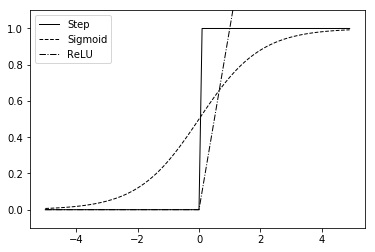

In [26]:
# code source: https://schwalbe10.github.io/thinkage/2017/02/12/activation.html
import numpy as np
import matplotlib.pylab as plt


def step(x):
    return np.array(x > 0, dtype=np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y_step = step(x)
y_sigmoid = sigmoid(x)
y_relu = relu(x)

plt.plot(x, y_step, label='Step', color='k', lw=1, linestyle=None)
plt.plot(x, y_sigmoid, label='Sigmoid', color='k', lw=1, ls='--')
plt.plot(x, y_relu, label='ReLU', color='k', lw=1, linestyle='-.')
plt.ylim(-0.1, 1.1)
plt.legend()
plt.show()